In [1]:
import os
import numpy as np
import gym
import tensorflow as tf
from time import time
from GA.genetic_algorithm import GeneticNetworks

from utils.atari_environment import AtariEnvironment
from utils.continuous_environments import Environment

from keras.backend.tensorflow_backend import set_session
from utils.networks import get_session

Using TensorFlow backend.


In [2]:
gym.logger.set_level(40)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
tensorboard_logs = "GA/tensorboard_gym"

In [4]:
!mkdir GA/tensorboard_gym
!mkdir saved_models

mkdir: cannot create directory ‘GA/tensorboard_gym’: File exists
mkdir: cannot create directory ‘saved_models’: File exists


In [5]:
# Clear any logs from previous runs
import shutil
shutil.rmtree(tensorboard_logs)

In [6]:
set_session(get_session())
summary_writer = tf.summary.FileWriter(tensorboard_logs)

In [7]:
env_name = 'Acrobot-v1'

args = {
    'gym_env': gym.make(env_name),
    'action_repeat': 4
}
env = Environment(**args)
print('observation_space ', env.get_state_size())
print('action_space ', gym.make(env_name).action_space)

action_dim = gym.make(env_name).action_space.n
space_dim = env.get_state_size()[0]

print(action_dim, space_dim, env_name)

observation_space  (6,)
action_space  Discrete(3)
3 6 Acrobot-v1


In [13]:
genetic_pop = GeneticNetworks(architecture=(space_dim * args['action_repeat'],16,action_dim),
                                population_size=64, 
                                generations=20,
                                episodes=15, 
                                mutation_variance=0.1,
                                render_env=False,
                                verbose=True)

--------------------------------------------------
Logging params: 
population_size 64
generations 20
mutation_variance 0.1
survival_ratio 0.1
both_parent_percentage 0.8
one_parent_percentage 0.1
episodes 15
--------------------------------------------------


## Train

In [14]:
%%time
genetic_pop.fit(env, summary_writer, num_cpus=4, env_args=args)


Generation:   0%|          | 0/20 [00:00<?, ? gen/s]
Generation:1| Highest Reward:-112.93333333333334| Average Reward:-450.53229166666665| std Reward: 110.34287061762147| Stagnation: 2| Population size: 64:   0%|          | 0/20 [00:30<?, ? gen/s]
Generation:1| Highest Reward:-112.93333333333334| Average Reward:-450.53229166666665| std Reward: 110.34287061762147| Stagnation: 2| Population size: 64:   5%|▌         | 1/20 [00:30<09:42, 30.65s/ gen]
Generation:1| Highest Reward:-112.93333333333334| Average Reward:-450.53229166666665| std Reward: 110.34287061762147| Stagnation: 2| Population size: 64:   5%|▌         | 1/20 [00:30<09:42, 30.65s/ gen]
Generation:2| Highest Reward:-130.86666666666667| Average Reward:-400.1541666666667| std Reward: 144.09013425003963| Stagnation: 3| Population size: 64:   5%|▌         | 1/20 [00:57<09:42, 30.65s/ gen] 
Generation:2| Highest Reward:-130.86666666666667| Average Reward:-400.1541666666667| std Reward: 144.09013425003963| Stagnation: 3| Population

CPU times: user 999 ms, sys: 439 ms, total: 1.44 s
Wall time: 4min 43s


[{'max': -112.93333333333334,
  'mean': -450.53229166666665,
  'std': 110.34287061762147},
 {'max': -130.86666666666667,
  'mean': -400.1541666666667,
  'std': 144.09013425003963},
 {'max': -109.46666666666667,
  'mean': -376.4083333333333,
  'std': 133.9051216243136},
 {'max': -110.0, 'mean': -287.1541666666667, 'std': 88.86145417555603},
 {'max': -138.2, 'mean': -460.40729166666665, 'std': 92.51878346613633},
 {'max': -134.46666666666667,
  'mean': -422.91041666666666,
  'std': 119.242461454447},
 {'max': -138.0, 'mean': -417.37395833333335, 'std': 128.90989726742575},
 {'max': -138.0, 'mean': -433.88541666666663, 'std': 114.80713807944632},
 {'max': -91.46666666666667,
  'mean': -345.9083333333333,
  'std': 160.29146001199746},
 {'max': -91.46666666666667, 'mean': -406.2375, 'std': 133.4929216158212}]

          max        mean         std
0 -112.933333 -450.532292  110.342871
1 -130.866667 -400.154167  144.090134
2 -109.466667 -376.408333  133.905122
3 -110.000000 -287.154167   88.861454
4 -138.200000 -460.407292   92.518783
5 -134.466667 -422.910417  119.242461
6 -138.000000 -417.373958  128.909897
7 -138.000000 -433.885417  114.807138
8  -91.466667 -345.908333  160.291460
9  -91.466667 -406.237500  133.492922


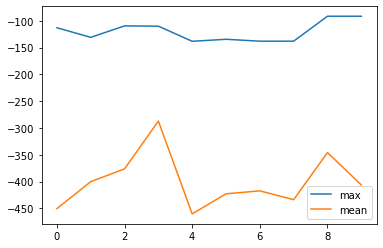

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(genetic_pop.global_info)
print(df)

fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.plot(df['max'], label='max')
plt.plot(df['mean'], label='mean')
plt.legend()
plt.show()

## Evaluate

In [16]:
# Lets observe our best network
genetic_pop.best_network.evaluate(env, episodes=3, render_env=False, record=False)

-247.33333333333334